In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import pickle

<h3> Analyse et preprocessing des données </h3>

In [182]:
df=pd.read_csv('zirconia_cubic.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,length,width,height,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [183]:
df=df.drop('Unnamed: 0',1)
df.head()

,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [184]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
length     float64
width      float64
height     float64
price        int64
dtype: object

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   length   26967 non-null  float64
 7   width    26967 non-null  float64
 8   height   26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [186]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,length,width,height,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [187]:
print('Dimensions du dataset avant suppression de doublons:', df.shape)
df.drop_duplicates(inplace=True)
print('Dimensions du dataset après suppression de doublons:', df.shape)

Dimensions du dataset avant suppression de doublons: (26967, 10)
Dimensions du dataset après suppression de doublons: (26933, 10)


In [188]:
df.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
length       0
width        0
height       0
price        0
dtype: int64

In [189]:
#Remplacer les NaN par la médiane
med=df.median()
df=df.fillna(med)
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
length     0
width      0
height     0
price      0
dtype: int64

In [190]:
df['length'].value_counts()
df['width'].value_counts()
df['height'].value_counts()
df['depth'].value_counts()
df['table'].value_counts()

56.0    4983
57.0    4771
58.0    4252
59.0    3300
55.0    3133
        ... 
76.0       1
64.2       1
61.6       1
50.1       1
58.7       1
Name: table, Length: 112, dtype: int64

In [191]:
# Vérification des dimensions valant 0
print((df.length==0).sum())
print((df.width==0).sum())
print((df.height==0).sum())

2
2
8


In [192]:
#Supprimer les dimensions valant 0
print(df.shape)
df = df.drop(df[df.length==0].index)
df = df.drop(df[df.width==0].index)
df = df.drop(df[df.height==0].index)
print(df.shape)

(26933, 10)
(26925, 10)


In [193]:
df.head(20)

,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


<h3>Data Visualization</h3>

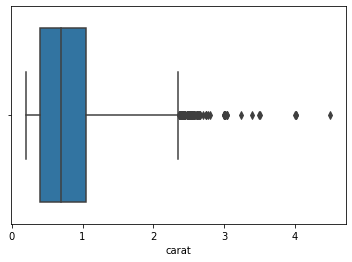

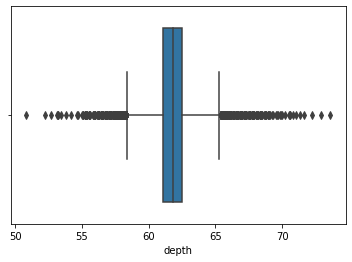

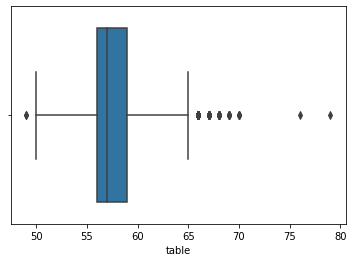

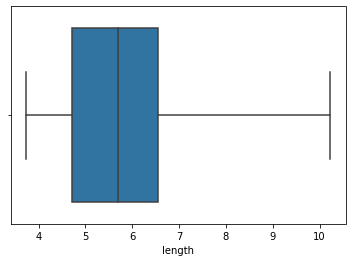

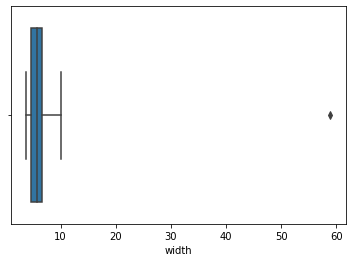

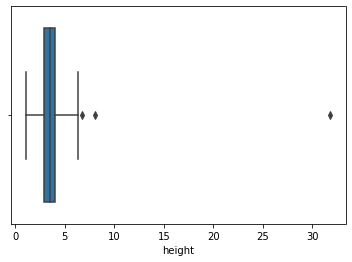

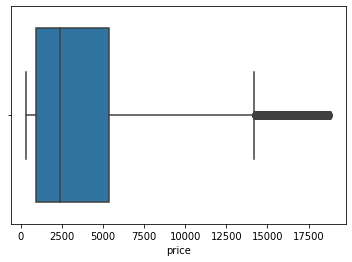

In [194]:
cols = ['carat','depth', 'table', 'length', 'width', 'height', 'price']
for i in cols:
    sns.boxplot(df[i],whis=2)
    plt.show();

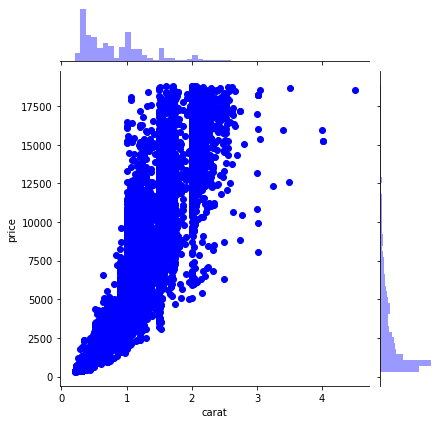

In [195]:
sns.jointplot(x = df['carat'], y = df['price'], color = 'blue')

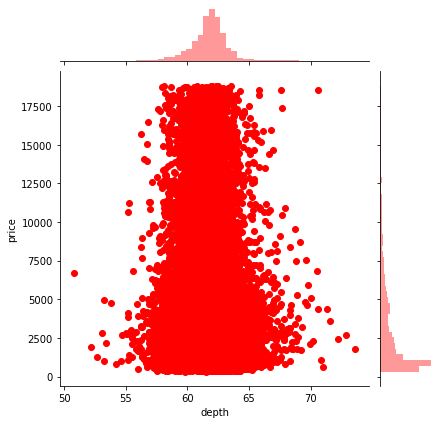

In [196]:
sns.jointplot(x = df['depth'], y = df['price'], color = 'red')

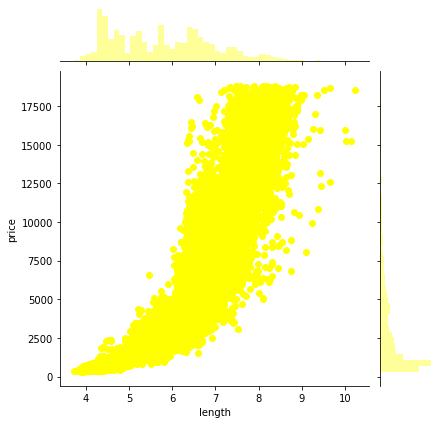

In [197]:
sns.jointplot(x = df['length'], y = df['price'], color = 'yellow')

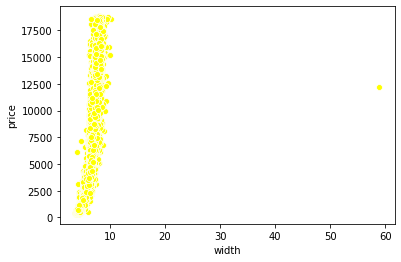

In [198]:
sns.scatterplot(x = df['width'], y = df['price'], color = 'yellow')

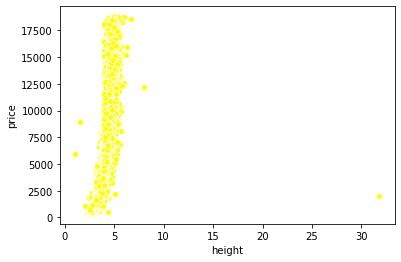

In [199]:
sns.scatterplot(x = df['height'], y = df['price'], color = 'yellow')

In [200]:
#Valeurs aberrantes dans les variables width et height remplacées par la valeur la plus fréquente

df['width'].values[df['width'].values>50]=df['width'].mode()[0]
df['height'].values[df['height'].values>30]=df['height'].mode()[0]

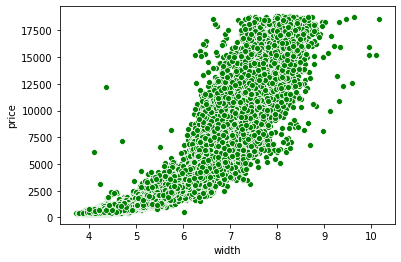

In [201]:
sns.scatterplot(x = df['width'], y = df['price'], color = 'green')

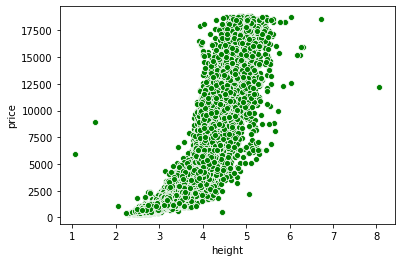

In [202]:
sns.scatterplot(x = df['height'], y = df['price'], color = 'green')

In [203]:
#Remplacer les niveaux de qualité affichées en string en int
df.cut=df['cut'].replace(('Fair', 'Good', 'Very Good', 'Premium', 'Ideal'), (range(1,6)))
df.color=df['color'].replace(('J','I','H','G','F','E','D'), (range(1,8)))
df.clarity=df['clarity'].replace(('I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF', 'FL'), (range(1,10)))
df.head(10)

,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.30,5,6,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,6,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,5,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,5,7,60.4,59.0,4.35,4.43,2.65,779
5,1.02,5,7,4,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,2,3,3,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,4,6,3,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,2,3,3,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,5,5,4,60.5,57.0,4.52,4.60,2.76,706


In [204]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,length,width,height,price
count,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000
mean,0.797821,3.909861,4.395023,4.054039,61.746982,57.455305,5.729385,5.731126,3.537739,3936.249991
std,0.477085,1.113127,1.706043,1.646618,1.393457,2.231327,1.126081,1.117835,0.696522,4020.983187
min,0.200000,1.000000,1.000000,1.000000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,3.000000,3.000000,3.000000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,5.690000,5.700000,3.520000,2373.000000
75%,1.050000,5.000000,6.000000,5.000000,62.500000,59.000000,6.550000,6.540000,4.040000,5353.000000
max,4.500000,5.000000,7.000000,8.000000,73.600000,79.000000,10.230000,10.160000,8.060000,18818.000000


Visualisation du nombre de diamants en fonction de chaque niveau de qualité (coupage, clarté, couleur)

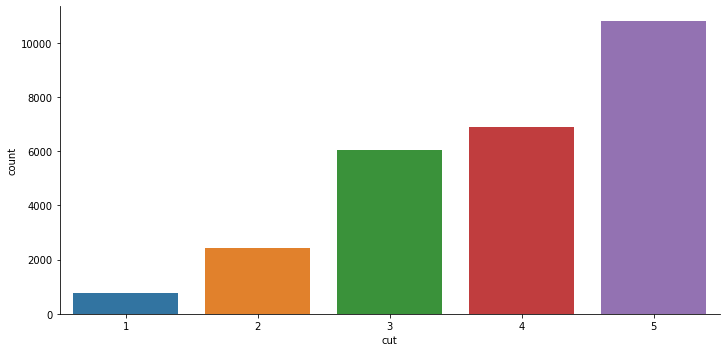

In [205]:
sns.catplot('cut', kind='count', data=df, aspect=2)

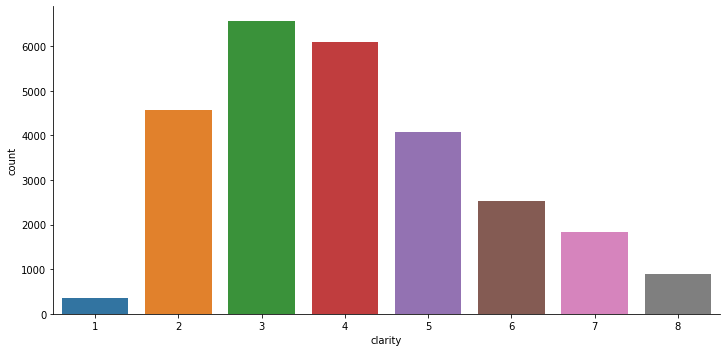

In [206]:
sns.catplot('clarity', kind='count', data=df, aspect=2)

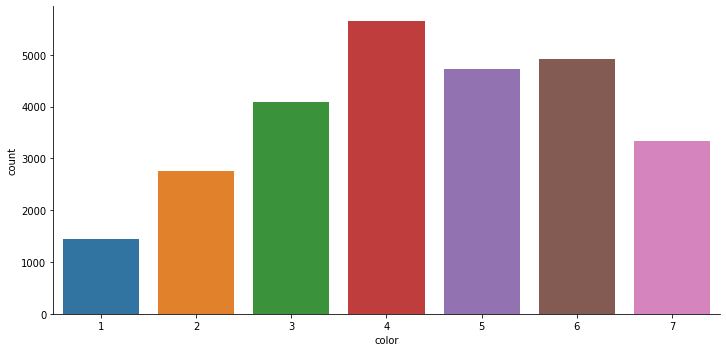

In [207]:
sns.catplot('color', kind='count', data=df, aspect=2)

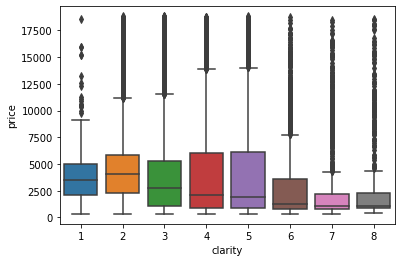

In [208]:
sns.boxplot(x='clarity', y='price',data=df)

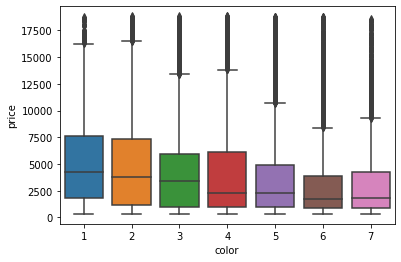

In [209]:
sns.boxplot('color', y='price', data=df)

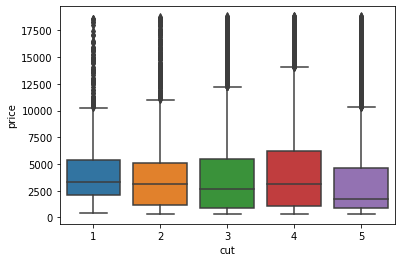

In [210]:
sns.boxplot('cut', y='price', data=df)

In [211]:
df.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
length     float64
width      float64
height     float64
price        int64
dtype: object

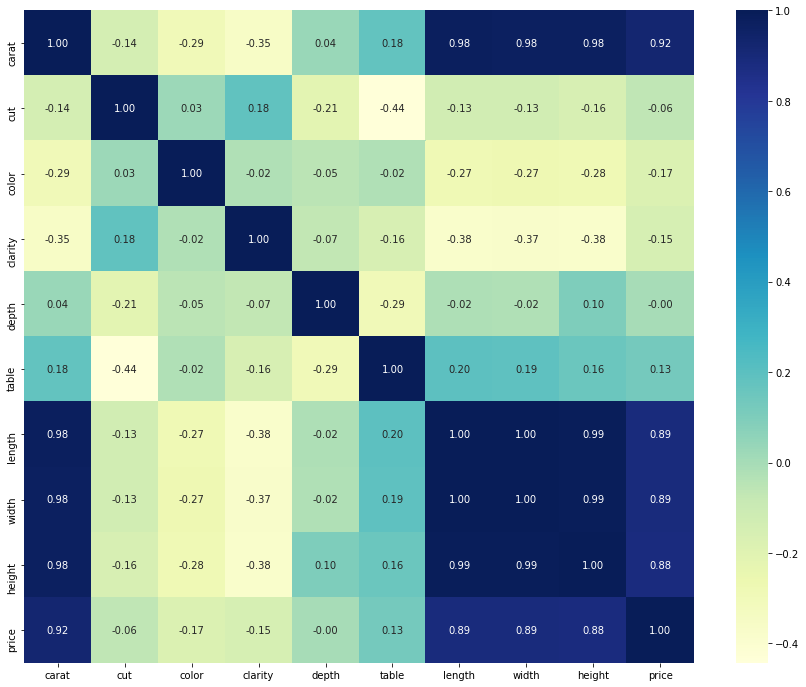

In [212]:
#Première visualisation de la matrice de corrélation
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='YlGnBu')
plt.show()

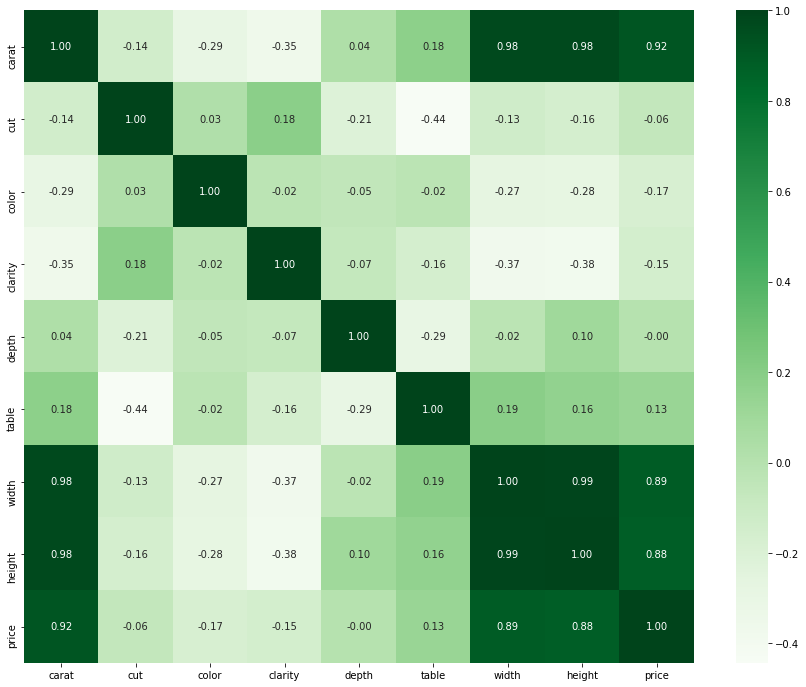

In [213]:
df=df.drop(['length'],1)
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Greens')
plt.show()

In [214]:
#df.to_csv('zirconia_cubic_cleaned')

<h3> Data Splitting & Modèles </h3>

In [215]:
X=df.drop('price', 1)
y=df['price']

In [216]:
X

,carat,cut,color,clarity,depth,table,width,height
0,0.30,5,6,3,62.1,58.0,4.29,2.66
1,0.33,4,4,8,60.8,58.0,4.46,2.70
2,0.90,3,6,6,62.2,60.0,6.12,3.78
3,0.42,5,5,5,61.6,56.0,4.80,2.96
4,0.31,5,5,7,60.4,59.0,4.43,2.65
...,...,...,...,...,...,...,...,...
26962,1.11,4,4,3,62.3,58.0,6.52,4.09
26963,0.33,5,3,8,61.9,55.0,4.42,2.74
26964,0.51,4,6,4,61.7,58.0,5.15,3.17
26965,0.27,3,5,6,61.8,56.0,4.20,2.60


In [217]:
y

0         499
1         984
2        6289
3        1082
4         779
         ... 
26962    5408
26963    1114
26964    1656
26965     682
26966    5166
Name: price, Length: 26925, dtype: int64

In [218]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=43)

In [219]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18847, 8), (8078, 8), (18847,), (8078,))

In [220]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(18847, 8) (8078, 8)
(18847,) (8078,)


In [221]:
X_train=X_train.reshape(-1,8)
X_test=X_test.reshape(-1,8)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18847, 8), (8078, 8), (18847, 1), (8078, 1))

<h3> LinearRegression </h3>

In [222]:
model1= LinearRegression()
fitted_model1=model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
score_train1=model1.score(X_train, y_train)
score_test1=model1.score(X_test,y_test)
predicted_train1=fitted_model1.predict(X_train)
predicted_test1=fitted_model1.predict(X_test)
mse_train1=mean_squared_error(y_train,predicted_train1)
mse_test1=mean_squared_error(y_test,predicted_test1)
rmse_train1=np.sqrt(mse_train1)
rmse_test1=np.sqrt(mse_test1)
mae_train1=mean_absolute_error(y_train,predicted_train1)
mae_test1=mean_absolute_error(y_test,predicted_test1)
mape_train1=(mae_train1/y_train.mean())*100
mape_test1=(mae_test1/y_test.mean())*100
print('R2 Score Train:', round(score_train1,2))
print('R2 Score Test:', round(score_test1,2))
#print('MSE Train :',mse_train1)
#print('MSE Test :', mse_test1)
print('RMSE Train :', round(rmse_train1,2))
print('RMSE Test :', round(rmse_test1,2))
print('MAE Train :', round(mae_train1,2))
print('MAE Test :', round(mae_test1,2))
print('MAPE Train:',round(mape_train1),'%')
print('MAPE Train:',round(mape_test1),'%')

R2 Score Train: 0.91
R2 Score Test: 0.9
RMSE Train : 1208.97
RMSE Test : 1237.27
MAE Train : 807.78
MAE Test : 800.56
MAPE Train: 21.0 %
MAPE Train: 20.0 %


In [44]:
#def prediction(carat,cut,color,clarity,depth,table,width,height):
 #   pickle_in = open('model_lr.pkl', 'rb')
  #  regressor = pickle.load(pickle_in)
   # pred=[carat,cut,color,clarity,depth,table,width,height]
    #price=np.array(pred).reshape(-1,8)
    #reg=regressor.predict(price)
    #return reg

#prediction(0,0,0,0,0,0,0,0)

In [127]:
y

0         499
1         984
2        6289
3        1082
4         779
         ... 
26962    5408
26963    1114
26964    1656
26965     682
26966    5166
Name: price, Length: 26925, dtype: int64

In [128]:
y_pred1

array([[2499.25574502],
       [1726.09260525],
       [6466.36753564],
       ...,
       [ 926.92959892],
       [9931.20899293],
       [2221.69444456]])

In [129]:
y_pred1.shape

(8078, 1)

<h3> RandomForestRegressor </h3>

In [223]:
model2=RandomForestRegressor(max_depth=2, random_state=0)
fitted_model2=model2.fit(X_train, y_train)
y_pred2=model2.predict(X_test)
score_train2=model2.score(X_train, y_train)
score_test2=model2.score(X_test,y_test)
predicted_train2=fitted_model2.predict(X_train)
predicted_test2=fitted_model2.predict(X_test)
mse_train2=mean_squared_error(y_train,predicted_train2)
mse_test2=mean_squared_error(y_test,predicted_test2)
rmse_train2=np.sqrt(mse_train2)
rmse_test2=np.sqrt(mse_test2)
mae_train2=mean_absolute_error(y_train,predicted_train2)
mae_test2=mean_absolute_error(y_test,predicted_test2)
mape_train2=(mae_train2/y_train.mean())*100
mape_test2=(mae_test2/y_test.mean())*100
print('R2 Score Train:', round(score_train2,2))
print('R2 Score Test:', round(score_test2,2))
#print('MSE Train :',mse_train2)
#print('MSE Test :', mse_test2)
print('RMSE Train :', round(rmse_train2,2))
print('RMSE Test :', round(rmse_test2,2))
print('MAE Train :', round(mae_train2,2))
print('MAE Test :', round(mae_test2,2))
print('MAPE Train:',round(mape_train2),'%')
print('MAPE Test:',round(mape_test2),'%')

C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R2 Score Train: 0.84
R2 Score Test: 0.83
RMSE Train : 1603.7
RMSE Test : 1626.22
MAE Train : 997.07
MAE Test : 1017.08
MAPE Train: 25.0 %
MAPE Test: 26.0 %


In [82]:
y_pred2

array([ 3065.06778106,  1050.28329094,  6234.3701053 , ...,
        1050.28329094, 12426.16545898,  3065.06778106])

In [83]:
model2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [84]:
param_svc={
 'max_depth': [3,4,5],
 'min_samples_leaf':[1,2,3],
 'min_samples_split':[3,4,5],
 'n_estimators': [100,200,300,400,500]
}

clf2=GridSearchCV(model2,param_svc,n_jobs=1,verbose=3)
y_pred2=model2.predict(X_test)
clf_fitted_model2=clf2.fit(X_train,y_train)
print(clf2.best_params_)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.903, total=   3.5s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.899, total=   3.2s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.6s remaining:    0.0s
C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.906, total=   3.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.902, total=   3.8s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.904, total=   4.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200, score=0.902, total=  10.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200, score=0.899, total=   6.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200, score=0.906, total=   5.5s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200, score=0.901, total=   5.3s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200, score=0.904, total=   5.4s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300, score=0.902, total=   8.2s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300, score=0.899, total=   9.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300, score=0.906, total=  15.4s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300, score=0.901, total=  11.4s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300, score=0.904, total=  10.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=400, score=0.902, total=  12.5s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=400, score=0.899, total=  12.5s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=400, score=0.906, total=  12.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=400, score=0.901, total=  10.8s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=400, score=0.905, total=  10.9s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=500, score=0.902, total=  13.5s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=500, score=0.899, total=  13.7s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=500, score=0.906, total=  14.5s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=500, score=0.901, total=  13.9s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=500, score=0.904, total=  13.9s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.903, total=   2.9s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.899, total=   2.5s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.906, total=   2.9s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.902, total=   2.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.904, total=   2.9s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200, score=0.902, total=   5.8s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200, score=0.899, total=   6.7s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200, score=0.906, total=   9.3s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200, score=0.901, total=   5.9s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200, score=0.904, total=   6.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, score=0.902, total=   8.8s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, score=0.899, total=   9.0s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, score=0.906, total=   8.8s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, score=0.901, total=   8.8s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, score=0.904, total=   8.2s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400, score=0.902, total=  12.0s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400, score=0.899, total=  10.9s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400, score=0.906, total=  10.7s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400, score=0.901, total=  11.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400, score=0.905, total=  14.0s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=500, score=0.902, total=  20.0s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=500, score=0.899, total=  24.4s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=500, score=0.906, total=  26.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=500, score=0.901, total=  28.5s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=500, score=0.904, total=  21.9s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.903, total=   4.4s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.899, total=   4.3s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.906, total=   4.3s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.902, total=   4.3s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.904, total=   4.3s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.902, total=   8.5s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.899, total=   8.7s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.906, total=   8.9s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.901, total=   8.5s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.904, total=   6.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300, score=0.902, total=   8.9s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300, score=0.899, total=   8.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300, score=0.906, total=   8.5s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300, score=0.901, total=   9.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300, score=0.904, total=   8.3s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.902, total=  11.9s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.899, total=  12.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.906, total=  11.2s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.901, total=  10.7s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.905, total=  11.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=500, score=0.902, total=  16.6s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=500, score=0.899, total=  19.7s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=500, score=0.906, total=  17.2s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=500, score=0.901, total=  18.7s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=500, score=0.904, total=  16.7s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.903, total=   4.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.899, total=   2.6s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.906, total=   3.8s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.902, total=   3.0s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.904, total=   4.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200, score=0.902, total=   5.7s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200, score=0.899, total=   5.4s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200, score=0.906, total=   5.4s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200, score=0.901, total=   5.7s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200, score=0.904, total=   5.4s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=300, score=0.902, total=   8.5s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=300, score=0.899, total=   7.9s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=300, score=0.906, total=   8.3s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=300, score=0.901, total=   8.0s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=300, score=0.904, total=   8.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=400, score=0.902, total=  10.7s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=400, score=0.899, total=  10.8s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=400, score=0.906, total=  11.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=400, score=0.901, total=  10.8s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=400, score=0.905, total=  10.8s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=500, score=0.902, total=  13.9s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=500, score=0.899, total=  13.5s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=500, score=0.906, total=  14.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=500, score=0.901, total=  13.6s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=500, score=0.904, total=  13.6s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.903, total=   2.5s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.899, total=   2.8s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.906, total=   2.5s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.902, total=   2.8s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.904, total=   2.5s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200, score=0.902, total=   5.6s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200, score=0.899, total=   6.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200, score=0.906, total=   5.8s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200, score=0.901, total=   5.4s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200, score=0.904, total=   5.8s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300, score=0.902, total=   9.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300, score=0.899, total=   8.8s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300, score=0.906, total=   8.7s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300, score=0.901, total=   9.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300, score=0.904, total=   9.0s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=400, score=0.902, total=  12.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=400, score=0.899, total=  12.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=400, score=0.906, total=  12.5s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=400, score=0.901, total=  13.5s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=400, score=0.905, total=  14.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=500, score=0.902, total=  15.3s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=500, score=0.899, total=  17.7s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=500, score=0.906, total=  17.4s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=500, score=0.901, total=  15.8s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=500, score=0.904, total=  16.7s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.903, total=   5.4s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.899, total=   4.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.906, total=   3.7s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.902, total=   3.4s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.904, total=   2.8s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.902, total=  10.0s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.899, total=  14.6s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.906, total=  20.6s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.901, total=  12.8s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.904, total=  10.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300, score=0.902, total=  16.0s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300, score=0.899, total=  14.5s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300, score=0.906, total=  15.4s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300, score=0.901, total=  14.3s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300, score=0.904, total=  17.3s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.902, total=  18.9s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.899, total=  17.8s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.906, total=  15.7s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.901, total=  15.5s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.905, total=  16.6s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=500, score=0.902, total=  17.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=500, score=0.899, total=  17.8s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=500, score=0.906, total=  20.9s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=500, score=0.901, total=  18.4s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=500, score=0.904, total=  16.9s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.903, total=   3.4s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.899, total=   3.4s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.906, total=   3.7s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.902, total=   3.3s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.904, total=   4.4s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.902, total=   7.5s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.899, total=   6.0s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.906, total=   5.9s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.901, total=   6.1s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.904, total=   7.3s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=300, score=0.902, total=   8.4s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=300, score=0.899, total=  11.6s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=300, score=0.906, total=   8.3s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=300, score=0.901, total=   9.4s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=300, score=0.904, total=  10.0s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=400, score=0.902, total=  12.4s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=400, score=0.899, total=  13.8s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=400, score=0.906, total=  15.9s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=400, score=0.901, total=  12.4s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=400, score=0.905, total=  14.9s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=500, score=0.902, total=  17.2s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=500, score=0.899, total=  20.6s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=500, score=0.906, total=  17.0s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=500, score=0.901, total=  16.0s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=500, score=0.904, total=  17.2s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.903, total=   3.7s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.899, total=   3.2s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.906, total=   3.5s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.902, total=   2.9s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.904, total=   3.5s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.902, total=   8.1s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.899, total=   7.4s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.906, total=   7.8s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.901, total=   6.7s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.904, total=   7.2s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300, score=0.902, total=   8.4s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300, score=0.899, total=   8.3s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300, score=0.906, total=   7.9s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300, score=0.901, total=   8.7s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300, score=0.904, total=   9.7s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, score=0.902, total=  15.8s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, score=0.899, total=  17.4s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, score=0.906, total=  17.5s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, score=0.901, total=  17.0s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, score=0.905, total=  17.3s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=500, score=0.902, total=  19.5s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=500, score=0.899, total=  23.5s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=500, score=0.906, total=  21.7s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=500, score=0.901, total=  18.5s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=500, score=0.904, total=  20.8s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.903, total=   7.1s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.899, total=   5.3s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.906, total=   5.8s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.902, total=   5.2s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.904, total=   4.8s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.902, total=   6.0s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.899, total=   5.6s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.906, total=   5.6s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.901, total=   5.7s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.904, total=  12.3s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=300, score=0.902, total=  14.0s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=300, score=0.899, total=  13.7s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=300, score=0.906, total=  15.2s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=300, score=0.901, total=  10.4s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=300, score=0.904, total=   8.5s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=400, score=0.902, total=  11.3s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=400, score=0.899, total=  11.6s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=400, score=0.906, total=  11.6s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=400, score=0.901, total=  11.3s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=400, score=0.905, total=  11.2s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=500, score=0.902, total=  14.5s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=500, score=0.899, total=  14.0s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=500, score=0.906, total=  17.3s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=500, score=0.901, total=  22.7s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=500, score=0.904, total=  18.2s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.931, total=   3.6s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.929, total=   3.7s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.935, total=   4.3s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.932, total=   4.4s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.929, total=   3.7s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=200, score=0.931, total=   9.0s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=200, score=0.929, total=   8.5s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=200, score=0.935, total=   7.7s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=200, score=0.932, total=   8.1s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=200, score=0.929, total=   8.0s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=300, score=0.931, total=  13.2s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=300, score=0.929, total=  12.3s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=300, score=0.935, total=  14.1s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=300, score=0.932, total=  13.2s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=300, score=0.930, total=  11.0s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=400, score=0.931, total=  17.9s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=400, score=0.929, total=  17.6s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=400, score=0.935, total=  16.2s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=400, score=0.931, total=  14.9s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=400, score=0.930, total=  13.7s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=500, score=0.932, total=  18.2s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=500, score=0.930, total=  17.6s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=500, score=0.935, total=  17.3s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=500, score=0.931, total=  18.2s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=500, score=0.930, total=  17.4s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.931, total=   3.5s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.929, total=   3.5s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.935, total=   3.3s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.932, total=   3.6s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.929, total=   3.5s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200, score=0.931, total=   6.8s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200, score=0.929, total=   6.8s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200, score=0.935, total=   7.4s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200, score=0.932, total=   7.1s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200, score=0.929, total=   7.1s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300, score=0.931, total=  10.4s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300, score=0.929, total=  10.3s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300, score=0.935, total=  10.4s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300, score=0.932, total=  10.8s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300, score=0.930, total=  11.4s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=400, score=0.931, total=  14.1s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=400, score=0.929, total=  13.9s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=400, score=0.935, total=  15.3s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=400, score=0.931, total=  14.6s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=400, score=0.930, total=  14.8s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, score=0.932, total=  17.2s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, score=0.930, total=  17.6s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, score=0.935, total=  17.3s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, score=0.931, total=  17.5s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, score=0.930, total=  17.2s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.931, total=   3.6s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.929, total=   3.6s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.935, total=   3.2s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.932, total=   3.5s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.929, total=   3.5s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.931, total=   7.2s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.929, total=   7.0s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.935, total=   7.0s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.932, total=   6.8s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.929, total=   7.1s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=300, score=0.931, total=  10.3s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=300, score=0.929, total=  10.3s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=300, score=0.935, total=  10.3s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=300, score=0.932, total=  10.3s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=300, score=0.930, total=  10.3s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.931, total=  13.8s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.929, total=  13.7s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.935, total=  14.0s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.931, total=  14.1s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.930, total=  14.5s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=500, score=0.932, total=  20.1s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=500, score=0.930, total=  23.2s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=500, score=0.935, total=  20.6s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=500, score=0.931, total=  17.0s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=500, score=0.930, total=  17.7s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.932, total=   3.2s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.929, total=   3.5s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.935, total=   3.5s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.932, total=   3.2s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.929, total=   3.5s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=200, score=0.931, total=   6.8s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=200, score=0.929, total=   7.2s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=200, score=0.935, total=   6.8s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=200, score=0.932, total=   7.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=200, score=0.929, total=   6.8s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=300, score=0.931, total=  10.3s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=300, score=0.929, total=  10.3s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=300, score=0.935, total=  10.3s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=300, score=0.932, total=  10.3s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=300, score=0.930, total=  10.3s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=400, score=0.931, total=  13.9s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=400, score=0.929, total=  14.2s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=400, score=0.935, total=  13.9s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=400, score=0.931, total=  13.8s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=400, score=0.930, total=  14.0s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=500, score=0.932, total=  17.4s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=500, score=0.930, total=  17.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=500, score=0.935, total=  17.5s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=500, score=0.931, total=  23.0s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=500, score=0.930, total=  22.5s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.932, total=   3.7s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.929, total=   3.9s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.935, total=   3.9s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.932, total=   3.9s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.929, total=   3.5s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=200, score=0.931, total=   7.8s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=200, score=0.929, total=   8.6s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=200, score=0.935, total=   7.7s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=200, score=0.932, total=   7.6s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=200, score=0.929, total=   8.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=300, score=0.931, total=  13.4s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=300, score=0.929, total=  10.5s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=300, score=0.935, total=  10.4s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=300, score=0.932, total=  10.6s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=300, score=0.930, total=  10.3s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=400, score=0.931, total=  14.0s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=400, score=0.929, total=  14.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=400, score=0.935, total=  14.0s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=400, score=0.931, total=  13.9s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=400, score=0.930, total=  13.8s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=500, score=0.932, total=  17.6s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=500, score=0.930, total=  17.4s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=500, score=0.935, total=  19.6s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=500, score=0.931, total=  20.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=500, score=0.930, total=  19.9s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.932, total=   3.6s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.929, total=   3.6s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.935, total=   3.3s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.932, total=   3.7s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.929, total=   3.7s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.931, total=   7.2s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.929, total=   7.2s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.935, total=   6.8s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.932, total=   6.9s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.929, total=   7.3s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=300, score=0.931, total=  10.3s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=300, score=0.929, total=  10.7s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=300, score=0.935, total=  10.5s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=300, score=0.932, total=  10.5s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=300, score=0.930, total=  10.4s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.931, total=  13.9s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.929, total=  13.9s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.935, total=  13.9s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.931, total=  13.7s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.930, total=  14.0s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=500, score=0.932, total=  17.8s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=500, score=0.930, total=  17.8s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=500, score=0.935, total=  17.5s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=500, score=0.931, total=  17.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=500, score=0.930, total=  17.6s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.931, total=   3.3s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.929, total=   3.6s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.935, total=   3.5s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.932, total=   3.3s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.929, total=   3.6s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.931, total=   7.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.929, total=   6.9s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.935, total=   6.8s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.932, total=   7.1s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.929, total=   7.3s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=300, score=0.931, total=  10.8s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=300, score=0.929, total=  11.5s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=300, score=0.935, total=  10.5s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=300, score=0.932, total=  10.3s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=300, score=0.930, total=  10.4s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=400, score=0.931, total=  14.0s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=400, score=0.929, total=  13.7s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=400, score=0.935, total=  14.0s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=400, score=0.931, total=  13.9s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=400, score=0.930, total=  14.4s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=500, score=0.932, total=  20.9s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=500, score=0.930, total=  24.7s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=500, score=0.935, total=  25.5s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=500, score=0.931, total=  25.6s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=500, score=0.930, total=  26.0s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.931, total=   5.1s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.929, total=   5.1s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.935, total=   5.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.932, total=   5.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.929, total=   5.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.931, total=  10.3s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.929, total=  10.4s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.935, total=  10.3s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.932, total=  10.3s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.929, total=  10.3s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=300, score=0.931, total=  15.4s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=300, score=0.929, total=  15.4s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=300, score=0.935, total=  15.4s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=300, score=0.932, total=  15.3s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=300, score=0.930, total=  15.3s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=400, score=0.931, total=  20.5s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=400, score=0.929, total=  20.6s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=400, score=0.935, total=  20.8s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=400, score=0.931, total=  20.6s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=400, score=0.930, total=  20.6s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=500, score=0.932, total=  25.5s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=500, score=0.930, total=  25.5s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=500, score=0.935, total=  25.6s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=500, score=0.931, total=  25.5s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=500, score=0.930, total=  25.6s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.931, total=   5.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.929, total=   5.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.935, total=   5.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.932, total=   5.1s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.929, total=   5.1s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.931, total=  10.3s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.929, total=  10.3s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.935, total=  10.4s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.932, total=  10.2s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.929, total=  10.5s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=300, score=0.931, total=  15.5s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=300, score=0.929, total=  15.4s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=300, score=0.935, total=  15.5s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=300, score=0.932, total=  15.4s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=300, score=0.930, total=  15.4s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=400, score=0.931, total=  20.7s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=400, score=0.929, total=  20.7s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=400, score=0.935, total=  20.7s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=400, score=0.931, total=  20.5s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=400, score=0.930, total=  20.9s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=500, score=0.932, total=  26.0s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=500, score=0.930, total=  25.8s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=500, score=0.935, total=  32.8s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=500, score=0.931, total=  26.3s
[CV] max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=500, score=0.930, total=  26.1s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.949, total=   6.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.950, total=   6.4s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.954, total=   6.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.952, total=   6.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.949, total=   6.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200, score=0.949, total=  12.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200, score=0.950, total=  12.3s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200, score=0.954, total=  12.7s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200, score=0.952, total=  12.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200, score=0.950, total=  12.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=300, score=0.949, total=  18.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=300, score=0.950, total=  18.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=300, score=0.954, total=  18.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=300, score=0.952, total=  18.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=300, score=0.950, total=  18.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=400, score=0.949, total=  24.7s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=400, score=0.950, total=  24.7s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=400, score=0.954, total=  24.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=400, score=0.952, total=  24.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=400, score=0.950, total=  24.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=500, score=0.949, total=  30.8s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=500, score=0.950, total=  30.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=500, score=0.954, total=  30.7s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=500, score=0.952, total=  31.7s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=500, score=0.950, total=  30.7s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.949, total=   6.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.950, total=   6.1s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.954, total=   6.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.952, total=   6.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.949, total=   5.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=200, score=0.949, total=  12.4s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=200, score=0.950, total=  12.4s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=200, score=0.954, total=  12.3s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=200, score=0.952, total=  12.4s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=200, score=0.950, total=  12.3s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, score=0.949, total=  18.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, score=0.950, total=  18.3s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, score=0.954, total=  18.8s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, score=0.952, total=  16.8s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, score=0.950, total=  14.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400, score=0.949, total=  18.7s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400, score=0.950, total=  19.3s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400, score=0.954, total=  16.7s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400, score=0.952, total=  16.4s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400, score=0.950, total=  16.4s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=500, score=0.949, total=  20.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=500, score=0.950, total=  21.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=500, score=0.954, total=  21.4s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=500, score=0.952, total=  20.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=500, score=0.950, total=  20.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.949, total=   4.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.950, total=   4.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.954, total=   4.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.952, total=   3.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.949, total=   4.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.949, total=   8.7s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.950, total=   8.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.954, total=   8.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.952, total=   8.3s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.950, total=   8.4s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300, score=0.949, total=  12.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300, score=0.950, total=  12.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300, score=0.954, total=  12.3s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300, score=0.952, total=  12.3s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300, score=0.950, total=  12.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.949, total=  16.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.950, total=  17.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.954, total=  17.3s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.952, total=  19.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.950, total=  19.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=500, score=0.949, total=  21.4s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=500, score=0.950, total=  20.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=500, score=0.954, total=  21.3s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=500, score=0.952, total=  20.6s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=500, score=0.950, total=  20.6s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.949, total=   4.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.950, total=   4.1s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.954, total=   4.1s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.952, total=   4.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.949, total=   4.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200, score=0.949, total=   8.4s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200, score=0.950, total=   8.1s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200, score=0.954, total=   8.3s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200, score=0.952, total=   8.4s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200, score=0.950, total=   8.1s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=300, score=0.949, total=  12.5s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=300, score=0.950, total=  12.6s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=300, score=0.954, total=  12.5s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=300, score=0.952, total=  12.4s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=300, score=0.950, total=  12.5s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=400, score=0.949, total=  19.0s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=400, score=0.950, total=  20.5s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=400, score=0.954, total=  18.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=400, score=0.952, total=  16.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=400, score=0.950, total=  16.8s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=500, score=0.949, total=  20.6s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=500, score=0.950, total=  20.7s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=500, score=0.954, total=  20.6s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=500, score=0.952, total=  20.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=500, score=0.950, total=  20.8s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.949, total=   4.0s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.950, total=   4.4s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.954, total=   4.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.952, total=   4.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.949, total=   4.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=200, score=0.949, total=   8.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=200, score=0.950, total=   8.3s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=200, score=0.954, total=   8.5s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=200, score=0.952, total=   9.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=200, score=0.950, total=   8.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=300, score=0.949, total=  12.5s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=300, score=0.950, total=  12.3s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=300, score=0.954, total=  12.6s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=300, score=0.952, total=  12.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=300, score=0.950, total=  12.6s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=400, score=0.949, total=  18.4s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=400, score=0.950, total=  19.1s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=400, score=0.954, total=  24.8s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=400, score=0.952, total=  16.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=400, score=0.950, total=  16.6s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=500, score=0.949, total=  20.8s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=500, score=0.950, total=  21.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=500, score=0.954, total=  29.4s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=500, score=0.952, total=  29.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=500, score=0.950, total=  39.3s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.949, total=   4.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.950, total=   4.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.954, total=   4.0s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.952, total=   4.3s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.949, total=   4.3s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.949, total=   8.6s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.950, total=   8.4s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.954, total=   8.3s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.952, total=  18.8s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.950, total=   9.6s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300, score=0.949, total=  12.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300, score=0.950, total=  17.1s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300, score=0.954, total=  12.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300, score=0.952, total=  16.0s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300, score=0.950, total=  12.4s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.949, total=  16.5s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.950, total=  17.0s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.954, total=  16.6s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.952, total=  17.0s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.950, total=  16.8s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=500, score=0.949, total=  21.3s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=500, score=0.950, total=  23.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=500, score=0.954, total=  20.7s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=500, score=0.952, total=  20.7s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=500, score=0.950, total=  22.4s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.949, total=   3.9s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.950, total=   4.7s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.954, total=   4.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.952, total=   4.6s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.949, total=   4.5s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.949, total=   8.9s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.950, total=   9.9s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.954, total=   9.5s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.952, total=   9.5s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.950, total=   9.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=300, score=0.949, total=  14.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=300, score=0.950, total=  15.3s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=300, score=0.954, total=  21.4s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=300, score=0.952, total=  12.4s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=300, score=0.950, total=  12.6s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=400, score=0.949, total=  16.6s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=400, score=0.950, total=  16.5s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=400, score=0.954, total=  16.6s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=400, score=0.952, total=  16.6s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=400, score=0.950, total=  16.5s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=500, score=0.949, total=  20.9s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=500, score=0.950, total=  20.6s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=500, score=0.954, total=  21.4s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=500, score=0.952, total=  20.6s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=500, score=0.950, total=  20.5s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.949, total=   4.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.950, total=   4.1s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.954, total=   4.0s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.952, total=   4.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.949, total=   4.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.949, total=   8.6s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.950, total=   8.3s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.954, total=   8.7s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.952, total=   9.3s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.950, total=   8.3s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=300, score=0.949, total=  12.3s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=300, score=0.950, total=  13.1s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=300, score=0.954, total=  12.8s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=300, score=0.952, total=  12.5s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=300, score=0.950, total=  12.3s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, score=0.949, total=  16.8s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, score=0.950, total=  16.9s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, score=0.954, total=  16.4s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, score=0.952, total=  16.7s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, score=0.950, total=  16.5s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500, score=0.949, total=  20.5s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500, score=0.950, total=  20.5s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500, score=0.954, total=  20.7s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500, score=0.952, total=  20.9s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500, score=0.950, total=  23.5s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.949, total=   5.0s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.950, total=   4.8s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.954, total=   4.9s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.952, total=   4.8s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=100 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.949, total=   4.8s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.949, total=   9.7s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.950, total=   8.3s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.954, total=   8.7s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.952, total=  18.7s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=200 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.950, total=  15.8s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=300, score=0.949, total=  19.9s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=300, score=0.950, total=  18.4s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=300, score=0.954, total=  15.4s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=300, score=0.952, total=  12.6s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=300 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=300, score=0.950, total=  12.7s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=400, score=0.949, total=  16.4s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=400, score=0.950, total=  16.6s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=400, score=0.954, total=  17.6s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=400, score=0.952, total=  16.4s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=400 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=400, score=0.950, total=  17.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=500, score=0.949, total=  20.9s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=500, score=0.950, total=  23.7s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=500, score=0.954, total=  20.7s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=500, score=0.952, total=  21.1s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=500 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=500, score=0.950, total=  20.8s


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed: 137.6min finished
C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}


In [85]:
clf_score_train2=clf2.score(X_train, y_train)
clf_score_test2=clf2.score(X_test,y_test)
clf_predicted_train2=clf_fitted_model2.predict(X_train)
clf_predicted_test2=clf_fitted_model2.predict(X_test)
clf_mse_train2=mean_squared_error(y_train,predicted_train2)
clf_mse_test2=mean_squared_error(y_test,predicted_test2)
clf_rmse_train2=np.sqrt(clf_mse_train2)
clf_rmse_test2=np.sqrt(clf_mse_test2)
clf_mae_train2=mean_absolute_error(y_train,clf_predicted_train2)
clf_mae_test2=mean_absolute_error(y_test,clf_predicted_test2)
clf_mape_train2=(clf_mae_train2/y_train.mean())*100
clf_mape_test2=(clf_mae_test2/y_test.mean())*100

print('R2 Score Train:', round(clf_score_train2,2))
print('R2 Score Test:', round(clf_score_test2,2))
#print('MSE Train :',clf_mse_train2)
#print('MSE Test :', clf_mse_test2)
print('RMSE Train :', round(clf_rmse_train2,2))
print('RMSE Test :', round(clf_rmse_test2,2))
print('MAE Train :', round(clf_mae_train2,2))
print('MAE Test :', round(clf_mae_test2,2))
print('MAPE Train:',round(clf_mape_train2),'%')
print('MAPE Test:',round(clf_mape_test2),'%')

R2 Score Train: 0.95
R2 Score Test: 0.95
RMSE Train : 1603.7
RMSE Test : 1626.22
MAE Train : 500.38
MAE Test : 514.85
MAPE Train: 13.0 %
MAPE Test: 13.0 %


<h3> GradientBoostingRegressor </h3>

In [224]:
model3 = GradientBoostingRegressor(random_state=0)
fitted_model3=model3.fit(X_train, y_train)
y_pred3=model3.predict(X_test)
score_train3=model3.score(X_train, y_train)
score_test3=model3.score(X_test,y_test)
predicted_train3=fitted_model3.predict(X_train)
predicted_test3=fitted_model3.predict(X_test)
mse_train3=mean_squared_error(y_train,predicted_train3)
mse_test3=mean_squared_error(y_test,predicted_test3)
rmse_train3=np.sqrt(mse_train3)
rmse_test3=np.sqrt(mse_test3)
mae_train3=mean_absolute_error(y_train,predicted_train3)
mae_test3=mean_absolute_error(y_test,predicted_test3)
mape_train3=(mae_train3/y_train.mean())*100
mape_test3=(mae_test3/y_test.mean())*100

print('R2 Score Train:', round(score_train3,2))
print('R2 Score Test:', round(score_test3,2))
#print('MSE Train :',mse_train3)
#print('MSE Test :', mse_test3)
print('RMSE Train :', round(rmse_train3,2))
print('RMSE Test :', round(rmse_test3,2))
print('MAE Train :', round(mae_train3,2))
print('MAE Test :', round(mae_test3,2))
print('MAPE Train:',round(mape_train3),'%')
print('MAPE Test:',round(mape_test3),'%')

C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 Score Train: 0.98
R2 Score Test: 0.98
RMSE Train : 589.3
RMSE Test : 613.96
MAE Train : 331.0
MAE Test : 345.45
MAPE Train: 8.0 %
MAPE Test: 9.0 %


In [87]:
y_pred3

array([ 2647.80644608,   753.78319862,  5852.18791115, ...,
         984.18419348, 11307.9835299 ,  2338.90347722])

In [88]:
model3.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [89]:
param_svc={'learning_rate': [0.1,0.2,0.3],
 'max_depth': [4,5,6,7],
 'min_samples_leaf': [10,50,100],
 'min_samples_split': [50,100,500],
 'subsample': [0.7,0.8,0.9],
 }

clf3=GridSearchCV(model3,param_svc,n_jobs=1,verbose=3)
clf_fitted_model3=clf3.fit(X_train,y_train)
print(clf3.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.977, total=   4.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s
C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=   3.9s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.0s remaining:    0.0s
C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.980, total=   3.8s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.980, total=   4.0s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=   4.0s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.978, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.980, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.980, total=   4.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.980, total=   4.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.979, total=   4.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.978, total=   5.0s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.980, total=   4.9s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.980, total=   4.8s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.980, total=   4.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.979, total=   5.0s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.978, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=   4.0s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.980, total=   4.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.980, total=   3.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=   4.0s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.978, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.980, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.980, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.980, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.979, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.977, total=   4.9s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=   4.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=   4.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=   4.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=   4.9s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.975, total=   4.0s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=   4.0s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.978, total=   4.0s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=   4.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=   3.8s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.976, total=   4.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.977, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.979, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=   4.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.977, total=   4.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.976, total=   4.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=   4.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=   4.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=   5.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.977, total=   5.8s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.977, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.979, total=   4.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.979, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.980, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.977, total=   4.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.978, total=   5.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=   6.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.980, total=   6.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=   6.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.978, total=   5.8s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.978, total=   5.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=   4.9s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=   4.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.980, total=   4.8s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.978, total=   4.8s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.977, total=   4.0s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.979, total=   4.0s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.979, total=   3.9s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.980, total=   3.9s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.977, total=   4.0s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.978, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.980, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=   4.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.978, total=   4.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.978, total=   4.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=   4.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=   4.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.980, total=   4.8s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.978, total=   5.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.975, total=   4.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.976, total=   4.0s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=   3.9s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.977, total=   4.2s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.976, total=   3.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.975, total=   5.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.977, total=   5.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.979, total=   4.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.977, total=   7.2s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.976, total=   9.8s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.976, total=   8.2s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.978, total=   6.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.978, total=   7.8s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.978, total=   7.2s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.976, total=   8.2s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.975, total=   6.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.977, total=   9.0s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.978, total=   6.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.977, total=   4.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.976, total=   3.9s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.976, total=   4.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.977, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.978, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.976, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.976, total=   4.8s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.978, total=   4.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.978, total=   4.9s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.978, total=   7.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.977, total=   4.8s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.975, total=   5.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.977, total=   5.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.978, total=   5.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.977, total=   6.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.976, total=   9.2s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.976, total=  11.9s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.977, total=  10.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=   9.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.978, total=   9.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.976, total=   9.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.976, total=   9.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.978, total=  10.0s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.978, total=  14.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.978, total=  12.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.977, total=   8.8s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.973, total=   6.9s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=   6.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.978, total=   6.8s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=   7.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.975, total=   6.8s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.974, total=   7.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.976, total=  10.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.978, total=  13.0s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.976, total=  20.8s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.975, total=  11.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.975, total=  15.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.976, total=  19.8s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.978, total=  10.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.976, total=   9.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.976, total=  10.7s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=   9.8s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.981, total=  16.8s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.981, total=  20.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.982, total=  18.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.980, total=  20.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.978, total=  17.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.980, total=  13.7s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.981, total=  16.1s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.981, total=  16.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.980, total=  11.8s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.979, total=  13.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.980, total=  18.4s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.981, total=  19.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.981, total=  23.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.980, total=  32.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.978, total=  25.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.981, total=  20.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.980, total=  18.1s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.981, total=  13.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.980, total=  12.6s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.978, total=  13.6s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.980, total=  24.1s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.981, total=  28.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.981, total=  21.7s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.980, total=  27.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=  38.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=  34.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.981, total=  34.5s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.981, total=  33.4s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=  34.6s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.976, total=  21.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.978, total=  16.8s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.979, total=  33.5s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.978, total=  18.6s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=  16.4s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.976, total=  30.7s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.979, total=  23.6s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.979, total=  18.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=  19.6s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=  21.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.976, total=  30.1s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=  34.7s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.980, total=  38.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=  38.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=  41.6s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=  28.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.980, total=  23.8s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.979, total=  17.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.980, total=  19.4s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.979, total=  10.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.978, total=  10.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.980, total=  10.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.980, total=   9.8s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.980, total=   9.6s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=   9.7s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=  10.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.980, total=   9.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.980, total=  12.1s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.981, total=  14.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=  11.7s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=   8.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.980, total=   8.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.979, total=   8.4s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.980, total=   8.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.979, total=   8.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.978, total=   9.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.980, total=   9.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.980, total=   9.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.980, total=   9.1s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=   8.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=  10.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.980, total=  10.1s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.980, total=  10.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.981, total=  10.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=  10.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.976, total=   7.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=   8.1s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=   7.8s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=   8.1s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.976, total=   8.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.976, total=   9.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.978, total=   8.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.979, total=   9.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.978, total=   9.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.977, total=   9.5s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.977, total=  10.1s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=  11.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.980, total=  10.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=  10.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.978, total=  10.1s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.975, total=   8.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.978, total=   8.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.978, total=   8.5s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.978, total=   8.4s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.977, total=   8.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.976, total=   9.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.978, total=   9.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=   9.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.978, total=   9.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.977, total=   9.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.977, total=  10.1s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  10.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  10.1s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  10.1s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.977, total=  10.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.975, total=   8.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.978, total=   8.4s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.978, total=   8.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.978, total=   8.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.977, total=   8.5s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.976, total=   9.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.978, total=   9.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=   9.5s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.978, total=   9.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.977, total=   9.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.977, total=  10.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  10.4s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=   9.6s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  10.1s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.977, total=  10.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.975, total=   9.7s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=   7.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.977, total=   8.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=   7.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=   8.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.975, total=   9.1s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.977, total=   9.1s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.978, total=   9.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.977, total=   9.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.976, total=  16.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.975, total=  13.6s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.978, total=  11.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.978, total=  10.6s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.978, total=  10.8s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.977, total=  10.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=  10.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.981, total=  10.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.981, total=  10.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.982, total=  10.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.980, total=  10.1s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.979, total=  12.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.981, total=  11.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.981, total=  15.0s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.982, total=  20.1s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.980, total=  14.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.979, total=  12.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.981, total=  12.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.981, total=  11.7s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.981, total=  11.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.981, total=  11.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=   9.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.981, total=   9.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.981, total=   9.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.982, total=   9.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.980, total=   9.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.979, total=  10.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.981, total=  10.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.981, total=  10.7s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.982, total=  10.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.980, total=  10.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=  11.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.981, total=  11.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.981, total=  11.6s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.981, total=  11.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=  12.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.976, total=   9.1s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.978, total=   9.1s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.979, total=  12.7s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.979, total=  13.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.978, total=  11.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.976, total=  10.0s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.979, total=  19.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.980, total=  20.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.979, total=  12.7s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=   9.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.976, total=  10.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=  10.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.980, total=  10.6s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.980, total=  10.6s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.978, total=  10.7s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.979, total=   9.0s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.980, total=   8.7s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.979, total=   8.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.981, total=   8.6s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=   8.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=   9.6s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.981, total=   8.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.980, total=   9.1s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.981, total=   8.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=   8.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=   9.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.981, total=   9.6s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.980, total=  10.0s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.981, total=   9.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=   9.7s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.979, total=   8.0s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.980, total=   8.1s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.979, total=   8.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.981, total=   8.0s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=   7.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=   8.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.981, total=  10.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.980, total=  12.1s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.981, total=  10.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=   9.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=  10.0s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.981, total=  10.0s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.980, total=   9.7s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.981, total=   9.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=   9.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.976, total=   7.7s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=   7.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=   7.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=   7.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.977, total=   7.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.976, total=   8.6s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.979, total=  12.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.979, total=  12.6s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.979, total=  11.0s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.977, total=  10.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.977, total=  11.7s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=  11.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.980, total=  12.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=  11.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.978, total=  11.7s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.976, total=   9.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.978, total=  10.1s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.978, total=   9.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.978, total=   9.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.977, total=   9.7s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.977, total=  11.1s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=  10.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=  10.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=  10.7s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.977, total=  11.0s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.977, total=  13.0s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  11.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  12.0s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  12.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.978, total=  11.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.976, total=   9.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.978, total=   9.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.978, total=   9.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.978, total=   9.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.977, total=   9.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.977, total=  10.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=  11.0s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=  10.7s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=  10.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.977, total=  10.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.977, total=  15.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  13.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  13.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  14.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.978, total=  14.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.975, total=  10.6s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=  10.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.977, total=  12.1s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.977, total=  10.1s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=  10.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.974, total=  11.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.977, total=  13.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.978, total=  13.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.977, total=  11.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.976, total=  11.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.975, total=  12.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.978, total=  12.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.979, total=  15.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.978, total=  13.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.976, total=  10.6s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.980, total=   9.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.981, total=  10.0s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.980, total=  11.1s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.982, total=  10.1s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.981, total=   9.6s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.979, total=  13.1s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.981, total=  12.0s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.981, total=  11.7s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.981, total=  12.7s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.980, total=  11.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.979, total=  12.0s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.981, total=  11.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.980, total=  13.7s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.981, total=  14.1s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.981, total=  13.5s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=  10.4s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.981, total=  13.7s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.981, total=  14.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.981, total=  10.1s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.980, total=  11.0s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.979, total=  13.7s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.981, total=  14.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.981, total=  13.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.982, total=  12.7s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.980, total=  11.7s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=  17.5s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.981, total=  14.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.981, total=  12.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.981, total=  11.6s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=  11.5s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.976, total=   8.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.979, total=   9.0s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.979, total=   8.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.978, total=   9.1s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.978, total=   8.7s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.976, total=   9.7s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=   9.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.980, total=   9.5s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.979, total=   9.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=   9.7s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.976, total=  10.6s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=  10.6s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.980, total=  11.0s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.980, total=  10.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.978, total=  10.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.979, total=   9.0s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.980, total=   8.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.980, total=   8.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.981, total=   8.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=   8.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=   9.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.980, total=  10.1s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.980, total=  10.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.981, total=   9.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=  10.0s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=  11.1s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.980, total=  11.1s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.980, total=  13.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.981, total=  14.5s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=  12.4s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.979, total=   9.5s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.980, total=  12.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.980, total=  11.6s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.981, total=  10.4s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=   9.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=  10.6s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.980, total=  10.4s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.980, total=  10.1s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.981, total=  13.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=  12.0s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=  11.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.980, total=  11.7s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.980, total=  12.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.981, total=  11.7s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=  12.5s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.976, total=   9.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=   9.6s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=  11.7s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=  10.6s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.977, total=  10.3s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.976, total=  11.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.978, total=  10.6s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.979, total=   9.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.979, total=  11.7s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.977, total=  11.1s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.976, total=  12.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.980, total=  12.4s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.980, total=  12.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=  13.7s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.978, total=  11.4s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.976, total=   9.0s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.979, total=   8.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.979, total=   8.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.978, total=   9.0s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.977, total=   8.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.977, total=   9.7s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=   9.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=  11.7s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=  10.1s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.978, total=   9.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.977, total=  10.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  11.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  11.1s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  13.4s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.978, total=  12.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.976, total=   9.4s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.979, total=   9.4s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.979, total=   9.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.978, total=   8.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.977, total=   8.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.977, total=  10.1s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=  10.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=  10.3s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=  10.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.978, total=  10.1s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.977, total=  11.1s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  11.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  11.3s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  11.1s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.978, total=  11.0s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.975, total=   8.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=   8.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.978, total=   8.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=   8.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=   8.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.975, total=   9.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.977, total=   9.7s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.978, total=   9.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.977, total=   9.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.976, total=   9.7s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.975, total=  10.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.978, total=  10.8s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.979, total=  11.0s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.978, total=  10.9s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.976, total=  11.2s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.978, total=   6.0s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.978, total=   6.0s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=   5.9s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.980, total=   6.0s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=   7.3s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.978, total=   7.8s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.979, total=   7.0s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.979, total=   6.8s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.980, total=   7.0s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.980, total=   6.9s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.977, total=   7.5s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.980, total=   7.3s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.980, total=   7.2s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.980, total=   7.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.979, total=   7.9s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.978, total=   6.1s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.978, total=   7.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=   6.5s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=   6.2s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=   6.1s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.977, total=   7.0s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.979, total=   8.5s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.979, total=   7.0s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.980, total=   6.5s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.980, total=   6.6s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.977, total=   7.0s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=   7.0s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=   6.9s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=   7.2s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=   7.2s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.975, total=   5.8s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.978, total=   5.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=   5.8s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=   5.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=   5.9s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.976, total=   6.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.977, total=   6.3s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=   6.3s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.979, total=   6.6s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=   8.1s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.975, total=   7.8s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=   7.2s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=   8.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=  10.1s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.978, total=   9.2s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=   7.3s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.979, total=   7.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.979, total=   7.5s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.980, total=   7.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=   7.9s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.978, total=   7.8s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=   6.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=   6.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.980, total=   6.5s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=   7.2s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.978, total=   8.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=   8.6s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=   8.6s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.980, total=   8.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.978, total=   7.5s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=   6.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.979, total=   6.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.979, total=   5.9s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.980, total=   5.8s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=   5.6s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.978, total=   6.2s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=   6.0s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=   6.5s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.980, total=   6.5s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=   6.2s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.978, total=   6.8s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=   7.0s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=   6.8s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.980, total=   6.8s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.978, total=   6.9s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.975, total=   5.5s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.977, total=   5.6s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=   5.5s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.977, total=   5.6s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.975, total=   5.5s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.976, total=   6.3s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.978, total=   6.2s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.979, total=   6.5s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.978, total=   5.9s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.977, total=   6.5s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.976, total=   6.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.978, total=   6.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.978, total=   6.8s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.978, total=   6.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.976, total=   6.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.976, total=   5.6s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.978, total=   5.6s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.978, total=   5.6s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.978, total=   5.6s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.977, total=   5.6s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.976, total=   6.1s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.978, total=   6.2s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=   6.3s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=   6.2s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.977, total=   6.1s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.976, total=   6.8s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.978, total=   7.1s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.980, total=   6.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=   6.8s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.977, total=   6.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.976, total=   5.5s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.978, total=   5.5s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.978, total=   5.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.978, total=   5.6s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.977, total=   5.6s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.976, total=   6.2s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.978, total=   6.3s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=   6.2s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=   6.3s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.977, total=   6.2s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.976, total=   6.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.978, total=   6.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.980, total=   6.9s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=   6.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.977, total=   6.9s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.975, total=   5.6s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.977, total=   5.6s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.977, total=   5.5s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.977, total=   5.6s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=   5.5s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.976, total=   6.1s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.977, total=   6.1s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.979, total=   6.3s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.977, total=   6.1s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.976, total=   6.1s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.975, total=   6.8s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.978, total=   6.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.979, total=   6.6s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.978, total=   6.6s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.975, total=   6.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.978, total=   6.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.980, total=   6.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=   6.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.980, total=   6.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.980, total=   6.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.979, total=   7.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.979, total=   7.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.979, total=   7.4s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.980, total=   7.6s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.980, total=   7.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.978, total=   8.3s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.980, total=   8.4s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.980, total=  11.3s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.981, total=  11.4s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.980, total=  10.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.978, total=   8.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.980, total=   9.0s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.980, total=   8.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.980, total=   8.6s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.980, total=   9.0s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.978, total=   9.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.979, total=   9.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.980, total=   9.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.980, total=   9.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.979, total=   9.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.978, total=  10.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=  10.6s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=  10.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=  10.6s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=  11.0s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.975, total=   8.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=   8.4s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.978, total=   9.3s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.979, total=   8.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.978, total=   8.6s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.976, total=   9.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=   9.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.979, total=  10.0s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=  10.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=   9.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.977, total=  10.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=  10.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.980, total=  10.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=  10.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.978, total=  13.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.979, total=  11.0s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.979, total=   7.3s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.979, total=   7.3s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.980, total=   7.0s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=   7.2s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.978, total=   7.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=   7.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=   7.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.980, total=   8.0s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.978, total=   7.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.978, total=   8.6s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.980, total=   8.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.980, total=   8.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.980, total=   8.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.978, total=   8.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.979, total=   7.1s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.979, total=   7.1s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.979, total=   7.0s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.980, total=   7.1s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=   7.0s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.978, total=   8.0s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=  12.2s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=  11.0s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.980, total=   8.0s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.978, total=   7.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.978, total=   8.4s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.980, total=   8.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.980, total=   8.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.980, total=   8.4s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.978, total=   8.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.976, total=   6.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=   7.0s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=   6.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=   6.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.976, total=   6.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.977, total=   7.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.978, total=   7.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.979, total=   7.6s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.978, total=   7.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.977, total=   7.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.977, total=   8.3s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=   8.3s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=   8.2s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=   8.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.978, total=   8.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.977, total=   6.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.979, total=   6.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.979, total=   6.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.978, total=   6.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.977, total=   7.1s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.977, total=   7.6s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=   7.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=   7.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=   7.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.977, total=   7.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.977, total=   8.4s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=   8.4s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=   8.2s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=   8.4s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.978, total=   8.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.977, total=   6.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.979, total=   7.1s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.979, total=   6.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.978, total=   6.6s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.977, total=   6.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.977, total=   7.2s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=   7.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=   7.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=   8.3s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.977, total=   7.4s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.977, total=   8.2s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=   8.1s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=   8.2s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=   8.2s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.978, total=   8.1s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.975, total=   6.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.977, total=   6.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.978, total=   6.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.977, total=   6.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=   6.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.976, total=   7.2s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.978, total=   7.4s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.979, total=   7.3s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.978, total=   7.4s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.976, total=   7.4s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.976, total=   8.1s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.979, total=   8.0s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.979, total=   8.0s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.978, total=   8.1s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.976, total=   8.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=   8.1s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.980, total=   8.1s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=   7.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.980, total=   8.1s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.981, total=   7.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.978, total=   8.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.980, total=   9.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.980, total=   8.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.980, total=   8.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.981, total=   8.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.977, total=   9.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.980, total=   9.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.979, total=   9.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.981, total=   9.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.981, total=  10.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=   8.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.980, total=   7.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=   8.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.980, total=   7.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.980, total=   8.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.978, total=   9.1s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.980, total=   9.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.979, total=   8.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.981, total=   8.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.980, total=   9.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.978, total=   9.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=   9.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=   9.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.981, total=   9.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=   9.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.976, total=   7.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.978, total=   7.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.978, total=   7.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=   7.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=   8.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.975, total=   8.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=   8.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.979, total=   8.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.979, total=   8.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=   8.6s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.977, total=   9.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=   9.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.980, total=   9.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.980, total=   9.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.978, total=   9.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.979, total=   7.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.980, total=   7.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.979, total=   8.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.980, total=   7.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=   8.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.978, total=   8.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.980, total=   8.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=   8.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.980, total=   9.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=   8.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.978, total=   9.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.980, total=   9.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=   9.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.980, total=  10.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=   9.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.979, total=   7.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.980, total=   8.3s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.979, total=   8.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.980, total=   7.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=   8.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.978, total=   8.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.980, total=   8.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=   9.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.980, total=   9.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=   9.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.978, total=   9.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.980, total=   9.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=   9.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.980, total=   9.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=   9.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.977, total=   7.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.979, total=   7.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=   7.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=   8.2s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.976, total=   7.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.977, total=   9.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.979, total=   8.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.979, total=   8.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.979, total=   8.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.977, total=   8.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.977, total=   9.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=   9.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=   9.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=   9.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.977, total=   9.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.977, total=   7.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.979, total=   7.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.979, total=   8.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.979, total=   7.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.977, total=   8.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.977, total=   8.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=   8.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=   8.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=   8.4s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.977, total=   9.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.978, total=   9.5s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=   9.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=   9.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.980, total=   9.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.977, total=   9.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.977, total=   7.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.979, total=   8.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.979, total=   8.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.979, total=   7.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.977, total=   8.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.977, total=   8.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=   9.1s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=   8.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=   8.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.977, total=   8.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.978, total=   9.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=   9.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=   9.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.980, total=   9.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.977, total=   9.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=   7.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.978, total=   7.6s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.978, total=   7.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.977, total=   7.6s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=   7.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.975, total=   8.6s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.978, total=   9.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.979, total=   8.6s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.978, total=   9.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.976, total=   8.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.976, total=   9.4s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.979, total=   9.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.980, total=   9.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.979, total=   9.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.976, total=   9.6s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=   9.7s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=   9.5s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=   9.3s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.980, total=   9.6s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=   9.3s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.978, total=  10.5s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.980, total=  10.8s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.979, total=  10.5s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.980, total=  10.6s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.980, total=  10.7s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.979, total=  11.7s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.980, total=  11.8s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.979, total=  11.7s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.980, total=  11.4s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.980, total=  11.9s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=   9.4s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.980, total=   9.5s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=   9.4s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.980, total=   9.3s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=   9.3s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.978, total=  10.2s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.980, total=  10.4s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.979, total=  10.8s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.981, total=  10.3s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.981, total=  10.6s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=  11.5s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=  11.6s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=  11.7s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.981, total=  11.7s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=  11.7s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=   9.2s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.978, total=   8.9s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=   9.4s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.978, total=   9.0s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=   9.4s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.976, total=   9.8s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=  11.8s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=  12.1s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.979, total=  16.1s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=  21.7s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.976, total=  13.6s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.978, total=1121.7min
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=  32.3s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=  20.9s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.978, total=  13.9s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=  10.9s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.980, total=  11.0s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.979, total=  11.1s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.981, total=  10.3s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=  10.4s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.978, total=  11.9s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.980, total=  11.1s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=  11.1s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.981, total=  10.3s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=  10.3s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=  11.9s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.980, total=  11.6s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=  11.7s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.980, total=  12.1s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=  11.8s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=   9.7s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.980, total=   9.9s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.979, total=   9.5s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.981, total=   9.8s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=   9.6s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.978, total=  10.5s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.980, total=  11.1s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=  11.0s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.981, total=  11.4s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=  11.0s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=  12.3s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.980, total=  12.6s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=  12.6s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.980, total=  12.0s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=  12.4s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.976, total=   9.3s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.979, total=   9.9s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=  15.9s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=  12.1s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.977, total=  10.4s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.977, total=  12.9s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.979, total=  12.1s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.979, total=  11.1s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.979, total=  10.9s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.977, total=  13.9s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.977, total=  15.5s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=  12.0s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=  15.1s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=  13.7s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.978, total=  16.0s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.977, total=  10.9s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.980, total=  11.1s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.979, total=  10.2s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.979, total=  10.7s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.977, total=  10.0s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.977, total=  11.1s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=  13.2s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=  11.4s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=  11.6s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.977, total=  14.6s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.978, total=  14.1s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  12.0s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  13.1s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  12.5s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.977, total=  12.0s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.977, total=   9.8s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.980, total=   9.6s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.979, total=  10.0s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.979, total=  11.0s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.977, total=  11.5s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.977, total=  11.4s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=  11.1s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=  12.4s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=  14.3s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.977, total=  11.5s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.978, total=  12.5s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  12.3s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  12.4s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  12.3s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.977, total=  12.2s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=   9.5s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.978, total=   9.4s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.979, total=   9.3s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.977, total=   9.5s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=   9.5s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.976, total=  10.7s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.978, total=  10.6s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.979, total=  10.8s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.978, total=  10.5s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.977, total=  10.7s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.976, total=  12.0s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.979, total=  11.8s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.979, total=  11.6s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.978, total=  11.6s
[CV] learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.2, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.977, total=  11.6s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.976, total=   6.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=   6.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=   6.4s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=   6.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=   6.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.977, total=   6.9s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.978, total=   6.8s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.978, total=   6.9s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.980, total=   7.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.978, total=   6.8s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.977, total=   7.7s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.978, total=   7.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.978, total=   7.8s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.979, total=   8.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.979, total=   7.8s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.977, total=   6.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.978, total=   6.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.978, total=   6.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=   6.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=   6.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.977, total=   7.0s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.979, total=   6.8s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.978, total=   6.9s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.979, total=   7.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.978, total=   7.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.977, total=   8.0s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.978, total=   7.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=   7.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=   7.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=   8.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.974, total=   6.4s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.978, total=   6.4s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.976, total=   7.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=   6.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.976, total=   6.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.976, total=   6.8s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.977, total=   6.6s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.977, total=   6.8s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=   6.6s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.977, total=   6.7s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.976, total=   7.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.977, total=   7.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.978, total=   7.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.978, total=   7.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.978, total=   7.6s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.976, total=   6.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=   6.6s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=   7.9s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.979, total=  13.8s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=   8.4s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.977, total=  12.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=  16.9s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.978, total=  19.0s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=  10.4s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.978, total=  10.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.977, total=  12.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.978, total=  19.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=  15.0s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=  22.7s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.978, total=  12.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.976, total=  13.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=  15.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=  13.9s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.979, total=  12.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=  12.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.977, total=   9.7s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=  10.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.978, total=  16.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=  14.4s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.978, total=  14.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.977, total=  13.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.978, total=  13.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=  14.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=  14.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.978, total=  13.6s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.975, total=  11.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.977, total=  10.7s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.977, total=  11.0s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.976, total=  12.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.976, total=  12.0s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.976, total=  15.0s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.977, total=  12.6s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.977, total=  16.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.978, total=  15.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.977, total=  12.9s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.976, total=  13.7s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.978, total=  13.6s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.978, total=  13.4s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.978, total=  13.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.977, total=  14.7s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.975, total=  15.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.978, total=  14.8s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.979, total=  15.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.977, total=  13.8s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.976, total=  20.0s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.976, total=  17.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.978, total=  13.7s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=  14.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.978, total=  15.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.977, total=  15.9s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.976, total=  12.7s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.978, total=  15.9s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  13.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  16.7s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.977, total=  14.6s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.975, total=  12.9s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.978, total=  15.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.979, total=  17.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.977, total=  15.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.976, total=  13.4s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.976, total=  12.7s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.978, total=  11.8s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=  11.8s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.978, total=  12.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.977, total=  12.7s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.976, total=  14.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.978, total=  14.7s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  12.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  12.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.977, total=  12.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.975, total=  11.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.977, total=  10.9s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.978, total=  10.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.977, total=  11.8s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=  13.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.976, total=  14.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.977, total=  16.8s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.978, total=  25.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.977, total=  13.9s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.975, total=  21.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.975, total=  21.9s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.977, total=  17.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.979, total=  15.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.978, total=  13.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.976, total=  15.6s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.978, total=  13.5s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.978, total=  14.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.978, total=  15.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=  13.5s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=  16.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.977, total=  20.2s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.979, total=  18.0s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.978, total=  16.6s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.979, total=  17.2s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.979, total=  18.2s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.978, total=  19.6s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.979, total=  18.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.979, total=  20.2s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.980, total=  18.6s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.979, total=  17.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.977, total=  14.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=  14.4s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=  16.1s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=  20.6s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=  16.2s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.978, total=  16.5s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.979, total=  16.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.979, total=  15.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.979, total=  15.3s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.978, total=  14.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.978, total=  16.3s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=  15.5s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=  15.0s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=  17.4s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=  15.1s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.975, total=  12.3s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=  12.0s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=  12.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.978, total=  13.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=  11.5s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.976, total=  14.3s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=  13.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.977, total=  14.2s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=  12.5s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.977, total=  13.0s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.976, total=  13.2s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.978, total=  13.2s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=  13.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=  13.5s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.978, total=  12.3s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.977, total=   8.6s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.979, total=   9.4s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=   8.4s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.979, total=   9.0s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=   8.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.977, total=  11.1s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=  10.5s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.978, total=  13.6s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=  15.3s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=  12.5s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.977, total=  13.6s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=  11.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=  11.3s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=  11.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.978, total=  13.1s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.977, total=   9.5s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.979, total=   8.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=  10.5s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.979, total=   9.2s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=  14.0s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.977, total=  12.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=  15.6s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.978, total=  12.5s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=  11.0s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=  11.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.977, total=  13.4s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=  12.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=  11.2s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=  12.5s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.978, total=  11.1s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.976, total=   9.2s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=  11.1s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.977, total=  11.1s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.977, total=   9.3s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.977, total=   9.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.975, total=   9.4s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.979, total=   9.4s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.978, total=   9.2s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.978, total=   9.2s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.977, total=   9.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.976, total=  11.6s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=  11.3s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=  11.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=  10.2s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.977, total=  10.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.975, total=   8.2s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.978, total=   8.3s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.979, total=  10.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.978, total=  11.4s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.977, total=  11.1s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.977, total=   9.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.978, total=  11.5s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=  11.0s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=   9.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.978, total=  11.5s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.976, total=  10.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  11.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  11.1s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  12.2s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.977, total=  12.0s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.975, total=  10.6s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.978, total=  10.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.979, total=   8.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.978, total=   8.3s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.977, total=  10.0s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.977, total=  23.6s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.978, total=  19.4s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=  15.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=  14.4s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.978, total=  12.1s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.976, total=  16.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  16.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  15.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  19.4s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.977, total=  26.1s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.975, total=  12.3s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.977, total=  12.6s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.978, total=  12.1s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.977, total=  11.5s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=  13.4s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.976, total=  13.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.978, total=  13.3s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.978, total=  15.6s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.977, total=  13.0s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.976, total=  12.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.975, total=  14.2s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.978, total=  12.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.979, total=  15.4s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.978, total=  12.4s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.977, total=  12.5s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.977, total=  12.4s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.978, total=  10.3s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.978, total=  10.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=  13.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.980, total=  12.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.977, total=  18.9s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.978, total=  18.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.977, total=  16.8s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.979, total=  12.5s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.980, total=  10.9s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.978, total=  11.9s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.979, total=  12.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.978, total=  12.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.978, total=  12.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.980, total=  12.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=   9.8s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=   9.8s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.978, total=  10.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=   9.7s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=   9.7s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.978, total=  15.6s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.979, total=  15.8s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.978, total=  10.9s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.980, total=  10.8s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.980, total=  11.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=  12.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=  12.7s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=  13.3s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=  11.7s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=  12.6s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.974, total=  10.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=   9.7s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=   9.8s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.978, total=  10.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=  10.7s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.976, total=  10.7s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=  10.5s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=  10.8s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.979, total=  10.6s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=  10.8s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.977, total=  13.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.978, total=  13.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.978, total=  11.9s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=  12.3s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.978, total=  16.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=  10.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=   9.5s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=   9.6s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=   9.5s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=   9.5s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.978, total=  10.6s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.978, total=  10.4s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.978, total=  10.8s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=  10.7s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.978, total=  10.9s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=  12.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=  15.3s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=  12.5s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.980, total=  12.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.978, total=  11.7s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=   9.5s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=   9.3s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=  10.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=  11.6s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=  12.9s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.978, total=  10.6s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.978, total=   9.3s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.978, total=   9.4s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=   9.4s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.978, total=   9.3s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=  10.3s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=  10.3s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=  10.6s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.980, total=  10.5s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.978, total=  10.3s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.975, total=   8.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.979, total=   8.3s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=   8.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.977, total=   8.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.976, total=   8.3s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.977, total=   9.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.978, total=   9.4s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.978, total=   9.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.978, total=   9.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.977, total=   9.3s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.976, total=  10.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=  10.4s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=  12.8s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=  12.9s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.976, total=  11.4s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.976, total=   8.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.979, total=   8.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.979, total=   8.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.979, total=   8.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.977, total=   8.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.977, total=   9.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=   9.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=   9.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=   9.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.977, total=   9.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.977, total=  10.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  10.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  10.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  10.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.977, total=  10.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.976, total=   8.6s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.979, total=   8.3s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.979, total=   8.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.979, total=   8.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.977, total=   8.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.977, total=   9.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=   9.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=   9.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=   9.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.977, total=   9.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.977, total=   9.9s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  10.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  10.5s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  10.6s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.977, total=  11.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=   9.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.978, total=   9.4s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.978, total=   8.8s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.977, total=   8.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=   8.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.975, total=   9.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.978, total=   9.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.979, total=   9.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.978, total=   9.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.976, total=   9.6s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.976, total=  10.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.979, total=  10.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.978, total=  10.4s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.978, total=  23.5s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.976, total=  16.1s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.977, total=  13.0s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.978, total=  13.1s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.977, total=  10.1s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.978, total=   9.9s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.7, score=0.979, total=  10.1s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.977, total=  11.1s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.979, total=  11.2s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.978, total=  11.2s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.980, total=  11.2s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.8, score=0.979, total=  11.2s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.978, total=  12.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.979, total=  12.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.978, total=  12.5s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.979, total=  13.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=50, subsample=0.9, score=0.979, total=  12.4s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.978, total=  11.6s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.978, total=  10.6s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=  10.6s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=   9.5s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.7, score=0.979, total=   9.4s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.977, total=  10.7s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.978, total=  11.6s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.978, total=  10.6s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.980, total=  10.5s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.8, score=0.980, total=  10.7s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=  12.4s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=  11.7s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=  11.8s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.979, total=  11.7s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=100, subsample=0.9, score=0.980, total=  11.6s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.975, total=   9.2s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=   9.2s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.976, total=   9.5s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=   9.2s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.7, score=0.977, total=   9.1s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.975, total=  10.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=  10.6s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=  10.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=  10.4s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.8, score=0.978, total=  10.4s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.975, total=  11.4s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=  11.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.979, total=  11.7s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.978, total=  11.4s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=10, min_samples_split=500, subsample=0.9, score=0.977, total=  11.5s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=   9.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=   9.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.978, total=   9.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.979, total=   9.1s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.7, score=0.979, total=   9.2s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.978, total=  10.7s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.978, total=  10.4s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.978, total=  10.6s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.979, total=  10.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.8, score=0.978, total=  10.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.978, total=  11.4s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=  11.6s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.978, total=  11.5s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=  11.5s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=50, subsample=0.9, score=0.979, total=  11.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=   9.2s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=   9.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.978, total=   9.2s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.979, total=   9.1s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.7, score=0.979, total=   9.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.978, total=  10.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.978, total=  10.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.978, total=  10.5s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.979, total=  10.4s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.8, score=0.978, total=  10.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.978, total=  10.9s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=  11.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.978, total=  11.4s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=  11.2s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=100, subsample=0.9, score=0.979, total=  11.2s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.975, total=   9.0s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=   8.8s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=   8.9s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.978, total=   8.9s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.7, score=0.977, total=   9.0s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.976, total=   9.9s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.978, total=  10.0s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.978, total=  10.1s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.979, total=  10.1s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.8, score=0.977, total=  10.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.977, total=  11.2s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=  11.1s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.978, total=  11.2s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.979, total=  11.2s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=500, subsample=0.9, score=0.977, total=  11.2s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.976, total=   9.0s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.979, total=   8.9s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.979, total=   9.0s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.979, total=   8.9s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.7, score=0.977, total=   9.0s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.977, total=  10.1s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.980, total=  10.1s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=  10.0s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.979, total=  10.0s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.8, score=0.978, total=  10.2s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.977, total=  11.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  11.4s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  11.4s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.979, total=  11.5s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=50, subsample=0.9, score=0.977, total=  11.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.976, total=   9.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.979, total=   9.2s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.979, total=   9.0s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.979, total=   9.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.7, score=0.977, total=   9.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.977, total=  10.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.980, total=  10.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=  10.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.979, total=  10.5s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.8, score=0.978, total=  10.5s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.977, total=  11.2s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  11.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  11.4s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.979, total=  11.5s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=100, subsample=0.9, score=0.977, total=  11.8s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.976, total=   9.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.978, total=   9.0s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.979, total=   9.1s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.978, total=   9.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.7, score=0.977, total=   9.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.976, total=  10.5s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.978, total=  10.4s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.979, total=  10.2s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.978, total=  10.5s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8 
[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.8, score=0.977, total=  10.3s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.976, total=  11.1s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.980, total=  10.9s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.979, total=  11.1s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.978, total=  11.6s
[CV] learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9 


C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.3, max_depth=7, min_samples_leaf=100, min_samples_split=500, subsample=0.9, score=0.976, total=  12.0s


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed: 1399.9min finished
C:\Users\utilisateur\anaconda3\envs\env\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 50, 'subsample': 0.7}


In [90]:
clf3.predict(X_test)

array([ 2595.16668879,   681.59117967,  5789.91727631, ...,
        1015.70104189, 10909.42773329,  2296.61890599])

In [91]:
clf_score_train3=clf3.score(X_train, y_train)
clf_score_test3=clf3.score(X_test,y_test)
clf_predicted_train3=clf_fitted_model3.predict(X_train)
clf_predicted_test3=clf_fitted_model3.predict(X_test)
clf_mse_train3=mean_squared_error(y_train,predicted_train3)
clf_mse_test3=mean_squared_error(y_test,predicted_test3)
clf_rmse_train3=np.sqrt(clf_mse_train3)
clf_rmse_test3=np.sqrt(clf_mse_test3)
clf_mae_train3=mean_absolute_error(y_train,clf_predicted_train3)
clf_mae_test3=mean_absolute_error(y_test,clf_predicted_test3)
clf_mape_train3=(clf_mae_train3/y_train.mean())*100
clf_mape_test3=(clf_mae_test3/y_test.mean())*100

print('R2 Score Train:', round(clf_score_train3,2))
print('R2 Score Test:', round(clf_score_test3,2))
#print('MSE Train :',clf_mse_train3)
#print('MSE Test :', clf_mse_test3)
print('RMSE Train :', round(clf_rmse_train3,2))
print('RMSE Test :', round(clf_rmse_test3,2))
print('MAE Train :', round(clf_mae_train3,2))
print('MAE Test :', round(clf_mae_test3,2))
print('MAPE Train:',round(clf_mape_train3),'%')
print('MAPE Test:',round(clf_mape_test3),'%')

R2 Score Train: 0.99
R2 Score Test: 0.98
RMSE Train : 589.3
RMSE Test : 613.96
MAE Train : 240.43
MAE Test : 281.85
MAPE Train: 6.0 %
MAPE Test: 7.0 %


In [66]:
res=pd.DataFrame({'R2 Score Train': [score_train1, score_train2, score_train3],
                  'R2 Score Test': [score_test1, score_test2, score_test3],
                  #'MSE Train': [mse_train1,mse_train2,mse_train3,mse_train4],
                  #'MSE Test': [mse_test1,mse_test2,mse_test3,mse_test4],
                  #'MSE Train (GridSearch)': ['NaN',clf_mse_train2,clf_mse_train3,clf_mse_train4],
                  #'MSE Test (GridSearch)': ['NaN',clf_mse_test2,clf_mse_test3,clf_mse_test4,clf_mse_test5,clf_mse_test6],
                  'RMSE Train': [round(rmse_train1),round(rmse_train2),round(rmse_train3)],
                  'RMSE Test': [round(rmse_test1),round(rmse_test2),round(rmse_test3)],
                  'MAE Train': [round(mae_train1),round(mae_train2),round(mae_train3)],
                  'MAE Test': [round(mae_test1),round(mae_test2),round(mae_test3)],
                  'MAPE Train': [round(mape_train1),round(mape_train2),round(mape_train3)],
                  'MAPE Test': [round(mape_test1),round(mape_test2),round(mape_test3)]},
                      index = ['LinearRegression', 'RandomForest', 'GradientBoosting'])

In [67]:
res_gscv=pd.DataFrame({'R2 Score Train': [clf_score_train2, clf_score_train3],
    'R2 Score Test': [clf_score_test2, clf_score_test3],
    'RMSE Train': [round(clf_rmse_train2),round(clf_rmse_train3)],
    'RMSE Test': [round(clf_rmse_test2),round(clf_rmse_test3)],
    'MAE Train': [round(clf_mae_train2),round(clf_mae_train3)],
    'MAE Test': [round(clf_mae_test2),round(clf_mae_test3)],
    'MAPE Train': [round(clf_mape_train2),round(clf_mape_train3)],
    'MAPE Test': [round(clf_mape_test2),round(clf_mape_test3)]},
        index= ['RandomForest','GradientBoosting'])

In [1]:
#res

In [2]:
#res_gscv

In [73]:
pickle.dump(clf_fitted_model3,open('model.pkl','wb'))

In [1]:
#model.predict(np.asarray([0,0,0,0,0,0,0,0]))